<h1>Clean Notebook for QMIND Project</h1>
<p>Contributors:
<ul>
<li>Karim Ali</li>
<li>Ola Elmaghraby</li>
<li>Aimee Langevin</li>
<li>Ali Zidan</li>
</ul>
Project Manager: Frank Siyung Cho</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import os
import random
from PIL import Image, ImageOps, ImageEnhance
from scipy.ndimage import median_filter

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2>Data Preprocessing</h2>

<p>First we will be displaying initial images in the dataset.<br>Special thanks to Ola who worked tirelessly on preprocessing and cropping images</p>

In [2]:
root = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/new_dataset_images'

In [3]:
#function displays a random image in a given subdirectory
def display_random_image_in_subdir(subdir_path):
    if os.path.isdir(subdir_path):
        all_files = os.listdir(subdir_path)

        jpeg_files = [file for file in all_files if file.lower().endswith(('.jpg'))]

        if jpeg_files: 
            random_jpeg = random.choice(jpeg_files) 
            random_jpeg_path = os.path.join(subdir_path, random_jpeg)

            img = cv2.imread(random_jpeg_path)
        
            if img is not None:
                img_resized = cv2.resize(img, (550,550))
            
                cv2.imshow('Random JPG Image in %s' %subdir_path, img_resized)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
        else:
            print("No JPEG files found in the directory.")

In [4]:
#display_random_image_in_subdir(root)

<p>Capture labels</p>

In [5]:
labels_df = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/Diabetic-Retinopathy-Detection/QMIND2024_Dataset/combined_dataset.csv')

In [6]:
print(labels_df.head())

                                            filename  label
0  QMIND2024_Dataset/new_dataset_images/201704131...      0
1  QMIND2024_Dataset/new_dataset_images/201704131...      0
2  QMIND2024_Dataset/new_dataset_images/201704131...      0
3  QMIND2024_Dataset/new_dataset_images/201704131...      0
4  QMIND2024_Dataset/new_dataset_images/201704131...      0


In [7]:
unique_counts = labels_df['label'].value_counts()
print(unique_counts)

label
0    10886
1     8010
2     1228
Name: count, dtype: int64


In [8]:
def print_unique_counts(unique_counts):
    plt.bar('No DR' , unique_counts[0], label= 'No DR')
    plt.bar('Non Proliferative' , unique_counts[1], label = 'Non Proliferative')
    plt.bar('Proliferative' , unique_counts[2], label = 'Proliferative')
    plt.xlabel("Diagnosis")
    plt.ylabel("No. of entries")
    plt.title("Unique Counts")
    plt.show()

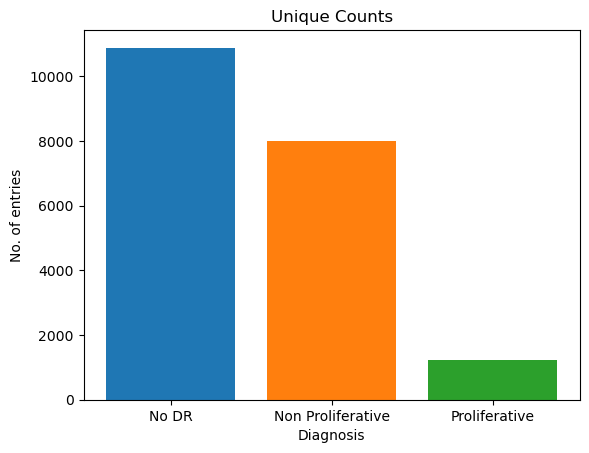

In [9]:
print_unique_counts(unique_counts)

<p>Image Enhancement techniques</p>

In [10]:
#image_files = os.listdir(root)
#x_train = [cv2.cvtColor(cv2.imread(os.path.join(root, file), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for file in image_files]

<p>First we are going to isolate the green channel of the images</p>

In [11]:
def print_channels(x_train):
    idx = 200
    plt.imshow(x_train[idx][:, :, 0], cmap='gray')
    plt.title("red channel")
    plt.show()
    plt.imshow(x_train[idx][:, :, 1], cmap='gray')
    plt.title("green channel")
    plt.show()
    plt.imshow(x_train[idx][:, :, 2], cmap='gray')
    plt.title("blue channel")
    plt.show()

In [12]:
#print_channels(x_train)

In [13]:
#isolate the green channel in every image
#x_train = np.array([x_train[i][:, :, 1] for i in range(len(x_train))])

In [14]:
#save all images in x_train into a new directory called 'enhanced_images' and another called iso_green_channel and convert them to .jpg files
new_dir1 = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/enhanced_images'
new_dir2 = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/iso_green_channel'

#for i in range(len(x_train)):
#    cv2.imwrite(os.path.join(new_dir1, image_files[i]), x_train[i])
#    cv2.imwrite(os.path.join(new_dir2, image_files[i]), x_train[i])

<p>Now we are going to apply a median filter to the enhanced grayscale images</p>

In [15]:
# Apply median filter with a specified filter size
#filtered_array = median_filter(x_train[230][:, :, 1], size=3)

# Convert the filtered array back to an image
#filtered_image = Image.fromarray(filtered_array)

In [16]:
def print_filtered_images(x_train, filtered_array):
    plt.imshow(x_train[230])
    plt.title("3 channels image")
    plt.show()
    plt.imshow(x_train[230][:, :, 1], cmap='gray')
    plt.title("green before median filter")
    plt.show()
    plt.imshow(filtered_array, cmap='gray')
    plt.title("after median filter")
    plt.show()

In [17]:
#print_filtered_images(x_train, filtered_array)

In [18]:
#apply median filter to all images in x_train
#x_train = np.array([median_filter(x_train[i], size=3) for i in range(len(x_train))])

In [19]:
#save all images in x_train into a new directory called 'median_filter_images' and convert them to .jpg files
new_dir3 = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/enhanced_images'

#for i in range(len(x_train)):
#    cv2.imwrite(os.path.join(new_dir3, image_files[i]), x_train[i])

<p>We are now going to apply a Contrast Limited Adaptive Histogram to the images</p>

In [20]:
def enhance_luminance(image, gamma=1/2.2):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v_channel = hsv_image[:, :, 2]
    normalized_v = v_channel / 255.0
    gamma_corrected_v = np.power(normalized_v, gamma)
    enhanced_v = (gamma_corrected_v * 255.0).astype(np.uint8)
    hsv_image[:, :, 2] = enhanced_v
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return enhanced_image

In [21]:
def enhance_contrast(image, gamma=1/2.2, clip_limit=0.3, tiles=(4, 4)):
    enhanced_image = enhance_luminance(image, gamma)
    lab_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2Lab)
    l_channel = lab_image[:, :, 0]
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tiles)
    enhanced_l_channel = clahe.apply(l_channel)
    lab_image[:, :, 0] = enhanced_l_channel
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)
    return enhanced_image

In [22]:
def process_images(directory, final_directory):
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        enhanced_contrast_image = enhance_contrast(image)
        cv2.imwrite(os.path.join(final_directory, filename), enhanced_contrast_image)

In [23]:
CLAHE_dir = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/CLAHE_images'
#process_images(new_dir3, new_dir3)

<p>Work on finalized labels</p>

In [24]:
#Reformat the labels for enhanced images
#df = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/new_dataset.csv', header=None)

#df[0] = df[0].str.replace('new_dataset_images', 'enhanced_images')
#df.to_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/enhanced_dataset.csv', index=False, header=False)

In [25]:
#Create a combined csv file which combines the contents of the original csv file and the enhanced csv file
#df1 = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/new_dataset.csv', header=None)
#df2 = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/enhanced_dataset.csv', header=None)

#df3 = pd.concat([df1, df2])

#add column names to the combined csv file 
#df3.columns = ['filename', 'label']
#df3.to_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/combined_dataset.csv', index=False)

In [26]:
labels_df = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/Diabetic-Retinopathy-Detection/QMIND2024_Dataset/combined_dataset.csv')

In [27]:
unique_counts = labels_df['label'].value_counts()
print(unique_counts)

label
0    10886
1     8010
2     1228
Name: count, dtype: int64


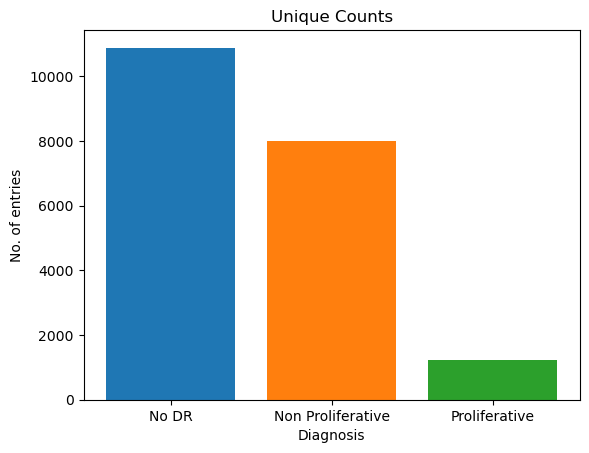

In [28]:
print_unique_counts(unique_counts)

<p>Image Augmentation techniques</p>

In [30]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.1,
                                    rotation_range=90,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [31]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="grayscale",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="training")

Found 18112 validated image filenames.


In [32]:
validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="grayscale",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="validation")

Found 2012 validated image filenames.


In [33]:
total_train_images = Train_IMG_Set.n
print(f"Total number of training images: {total_train_images}")

total_validation_images = validation_IMG_Set.n
print(f"Total number of validation images: {total_validation_images}")

Total number of training images: 18112
Total number of validation images: 2012


In [34]:
for i, (images, labels) in enumerate(Train_IMG_Set):
    print(f"Batch {i}, Image batch shape: {images.shape}, Labels batch shape: {labels.shape}")
    if i == 1: 
        break

Batch 0, Image batch shape: (50, 256, 256, 1), Labels batch shape: (50,)
Batch 1, Image batch shape: (50, 256, 256, 1), Labels batch shape: (50,)


50


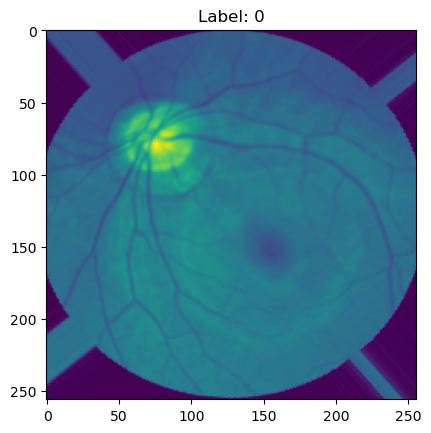

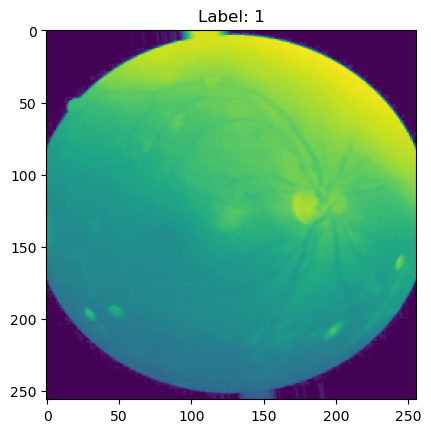

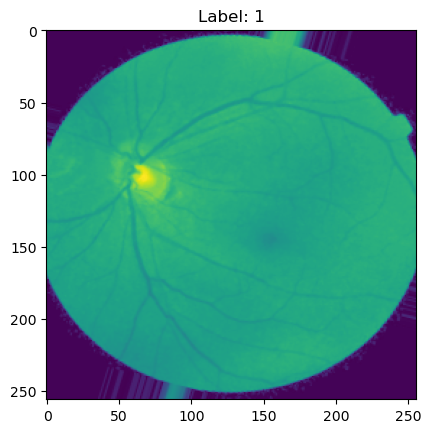

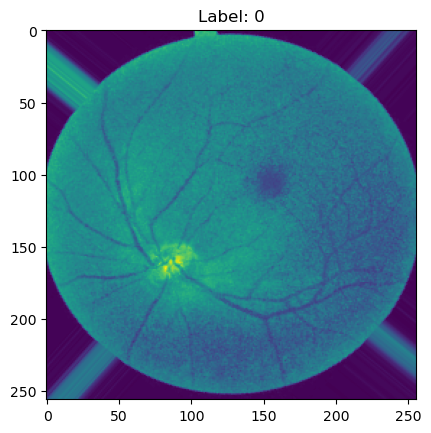

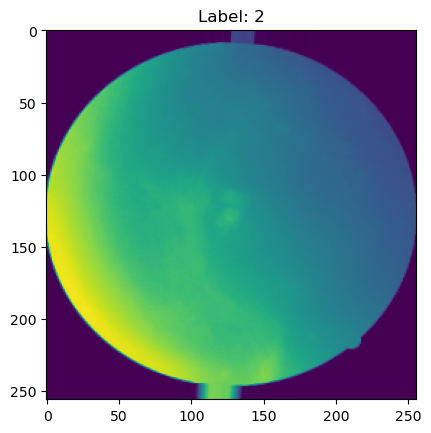

In [35]:
images, labels = next(Train_IMG_Set)
print(len(images))

for i in range(5): 
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()